In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Define the firectory path
data_dir = 'C:\\Users\\Bhavani\\Downloads\\DL_Project\\Advanced_Blood_Cell\\data_set\\dataset2-master\\dataset2-master\\images\\TRAIN'
#Define the class Labels
class_labels = ['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']

In [3]:
#Initialize lists to hold file paths and tabels
filepaths =[]
labels = []
#Loop through each class directory and gather file paths and labels
for label in class_labels:
 class_dir = os.path.join(data_dir, label)
for file in os.listdir(class_dir):
  if file.endswith('.jpeg') or file.endswith('.png'):
    filepaths.append(os.path.join(class_dir, file))
    labels.append(label)

In [4]:
#Create DataFrame from the file paths and Labels
bloodcell_df = pd.DataFrame({
   'filepaths': filepaths,
   'labels': labels
})

In [5]:
# shuffle the DataFrame
bloodcell_df = bloodcell_df.sample(frac=1).reset_index(drop=True)

In [6]:
bloodcell_df.head()

,filepaths,labels
0,C:\Users\Bhavani\Downloads\DL_Project\Advanced...,neutrophil
1,C:\Users\Bhavani\Downloads\DL_Project\Advanced...,neutrophil
2,C:\Users\Bhavani\Downloads\DL_Project\Advanced...,neutrophil
3,C:\Users\Bhavani\Downloads\DL_Project\Advanced...,neutrophil
4,C:\Users\Bhavani\Downloads\DL_Project\Advanced...,neutrophil


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your separate train and test directories
train_dir = 'C:\\Users\\Bhavani\\Downloads\\DL_Project\\Advanced_Blood_Cell\\data_set\\dataset2-master\\dataset2-master\\images\\TRAIN'
test_dir = 'C:\\Users\\Bhavani\\Downloads\\DL_Project\\Advanced_Blood_Cell\\data_set\\dataset2-master\\dataset2-master\\images\\TEST'  # Adjust path if needed

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create train generator directly from directory
train = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create test generator (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


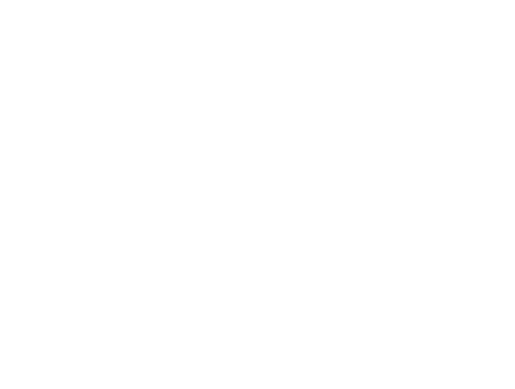

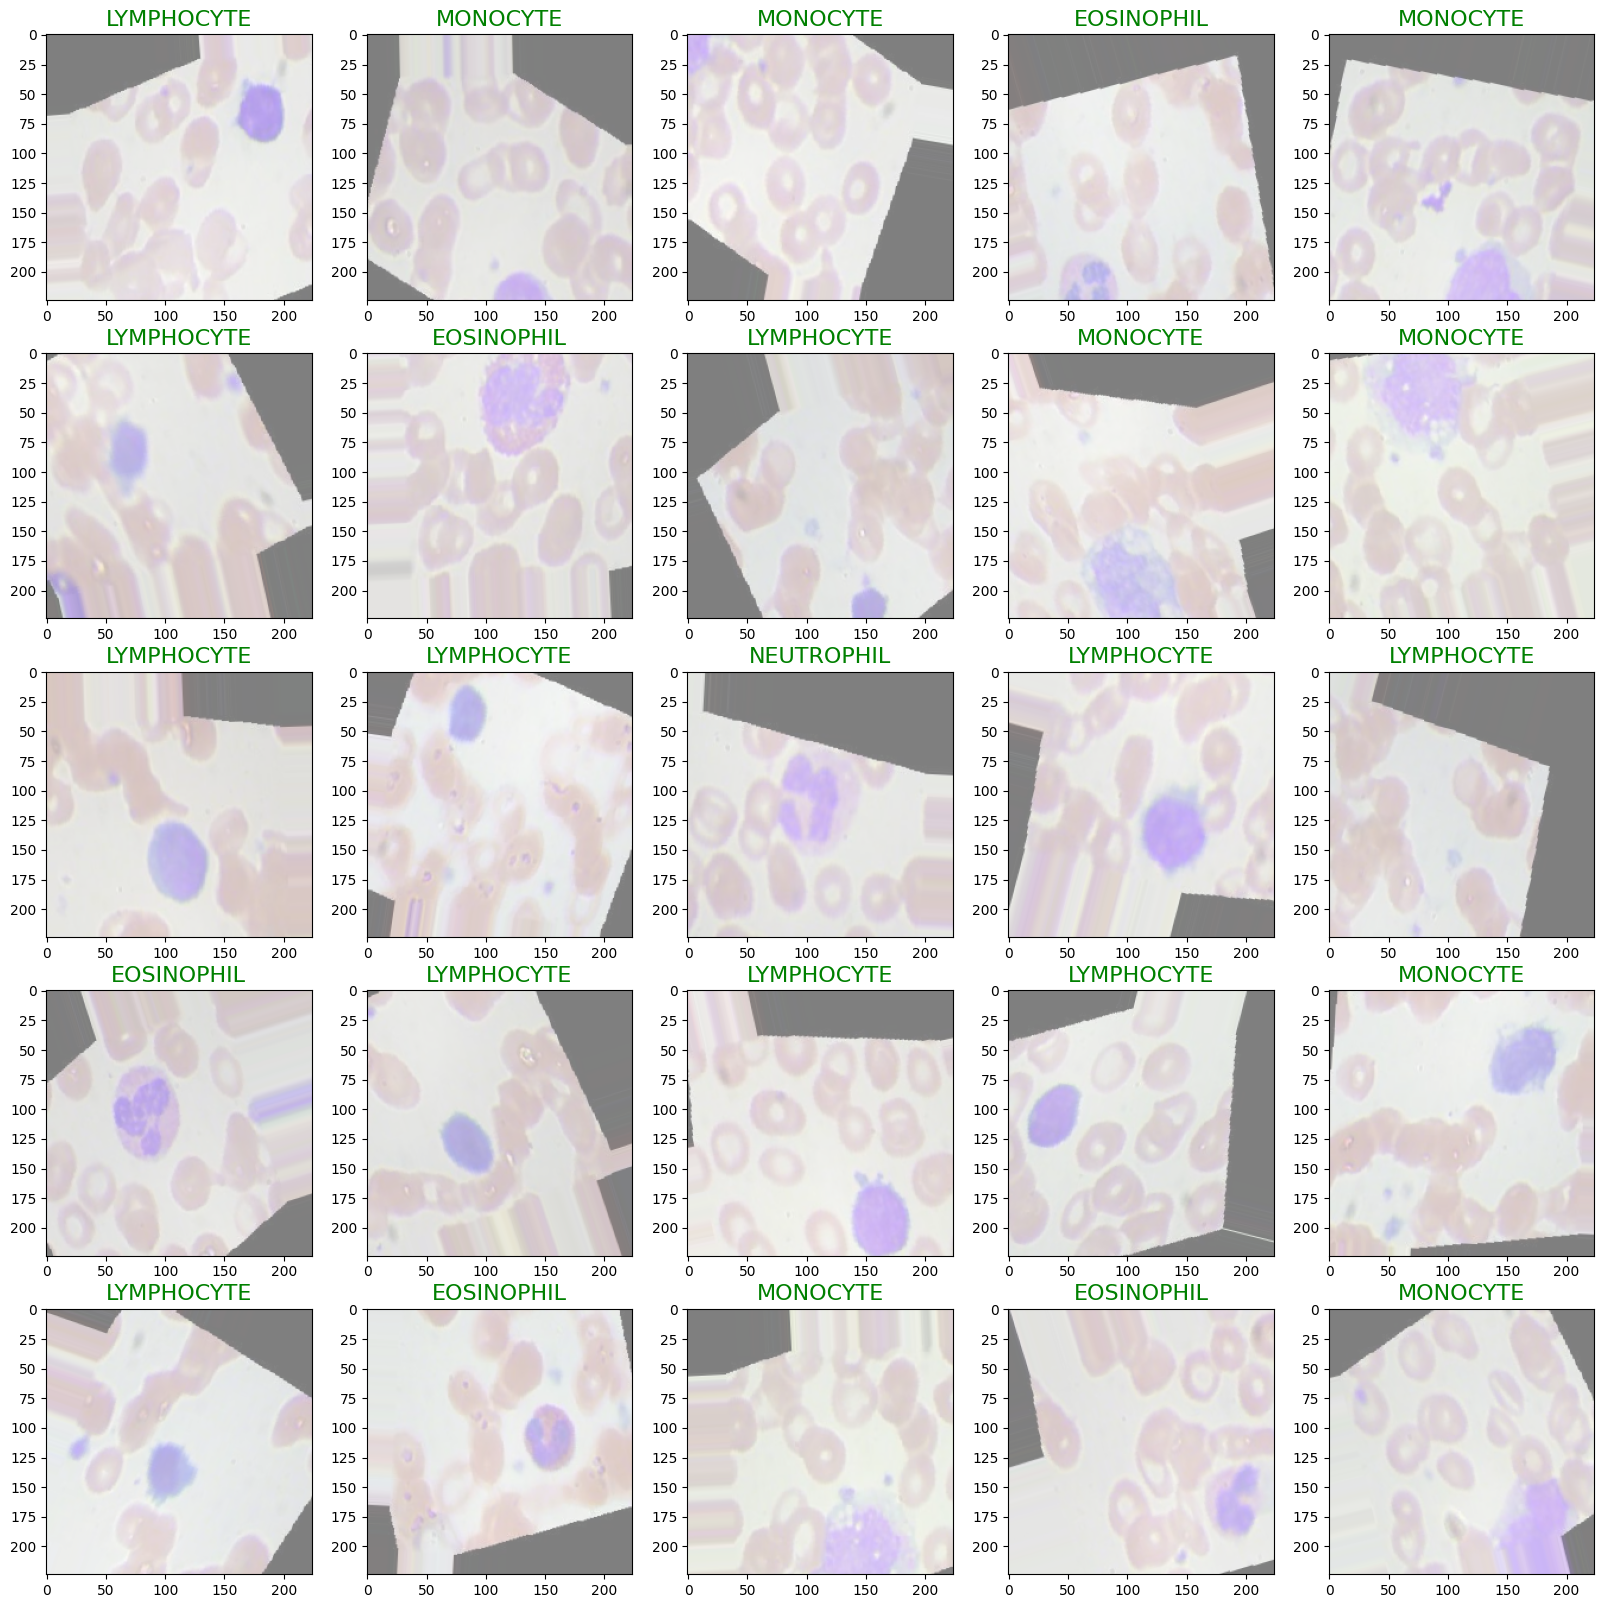

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def show_knee_images(image_gen):
    test_dict = image_gen.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes [index]
        plt.title(class_name, color="green", fontsize=16)
plt.axis('off')
plt.show()
show_knee_images(train)

In [9]:
# Using flow_from_directory approach instead of dataframe splitting
# No need to split dataframe when using separate TRAIN/TEST folders

In [10]:
# Create validation generator (split from train data)
# Since you only have TRAIN and TEST folders, use TEST as validation
val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
val = val_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=8,
    shuffle=False
)

Found 2487 images belonging to 4 classes.


In [11]:
model= keras.models.Sequential([
keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D (pool_size=(3, 3)),
keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation= 'relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2, 2)),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(pool_size=(2, 2)),
keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D (pool_size=(2, 2)),
keras.layers.Flatten(),
keras.layers.Dense (1024, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense (1024, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(4, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

c:\Users\Bhavani\Downloads\DL_Project\dlenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,04

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [ ]:
# Reinitialize generators to reset state
train = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

history = model.fit(train, epochs=5, validation_data=val, verbose=1)

Found 9957 images belonging to 4 classes.
Epoch 1/5
 91/312 ━━━━━━━━━━━━━━━━━━━━ 1:23:21 23s/step - accuracy: 0.2596 - loss: 2.7147

In [1]:
pred model.predict(test)
pred np.argmax(pred, axis-1) #pick class with highest probability
labels (train.class_indices)
labels dict((v,k) for k,v in labels.items())
pred2 [labels [k] fork in pred]


SyntaxError: invalid syntax (2944674038.py, line 1)

In [ ]:

plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch")
plt.legend(['train', 'val'], loc'upper left')
plt.show()

In [ ]:
pit.plot(history.history loss historyl.history less ]]
plt.plot(history.history val loss historyi.history['val_loss'])
plt.title(sodel lass')
plt.ylabel('loss')
plt.xlabel('epoch'
pit. legend("train', 'val'), loc upper left)
pit.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_test test_images.labels # set y test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","(:.1f}%".format(accuracy_score(y_test, pred2)*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL"]
cm confusion_matrix(y_test, pred2)
plt.figure(figsize(10, 7))
sns.heatmap(cm, annot True, fmt='g', vmin-e, cmap='Blues')
plt.xticks(ticks-[0.5, 1.5, 2.5, 3.5), labels-class_labels)
plt.yticks(ticks-[0.5, 1.5, 2.5, 3.5), labels-class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("Blood Cell.h5")